# Classification Naive Bayes

Classification binaire avec Naive Bayes Gaussien

## 1. Importation des bibliothèques

In [391]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

## 2. Génération des données

In [392]:
np.random.seed(42)

# Générer 200 échantillons avec 2 variables explicatives et 2 classes
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,  # Séparation suffisante entre les classes
)

print(f"Nombre d'échantillons : {X.shape[0]}")
print(f"Nombre de variables : {X.shape[1]}")
print(f"Distribution des classes : Classe 0 = {np.sum(y == 0)}, Classe 1 = {np.sum(y == 1)}")

Nombre d'échantillons : 200
Nombre de variables : 2
Distribution des classes : Classe 0 = 100, Classe 1 = 100


## 3. Séparation des données

In [393]:
# Diviser en ensemble d'entraînement (70%) et de test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Taille de l'ensemble de test : {X_test.shape[0]}")

Taille de l'ensemble d'entraînement : 140
Taille de l'ensemble de test : 60


## 4. Modélisation avec Naive Bayes Gaussien

In [394]:
# Définir le modèle Naive Bayes Gaussien
model = GaussianNB()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

print("Modèle entraîné avec succès!")

Modèle entraîné avec succès!


## 5. Évaluation du modèle

In [395]:
# Prédire les classes de l'ensemble de test
y_pred = model.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy du modèle : {accuracy:.4f} ({accuracy * 100:.2f}%)")

Accuracy du modèle : 0.9833 (98.33%)


## 6. Visualisation des régions de décision

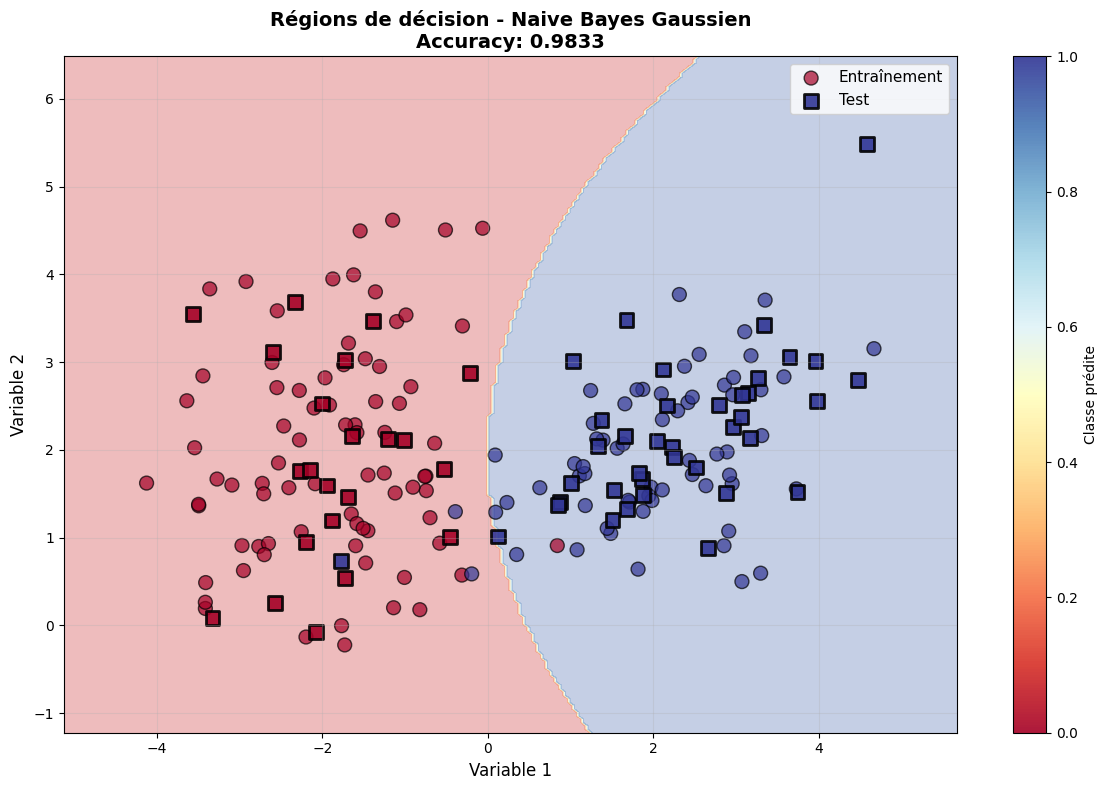

In [396]:
# Créer une grille de points couvrant l'espace des données
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Prédire la classe pour chaque point de la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Créer la visualisation
plt.figure(figsize=(12, 8))

# Tracer les régions de décision
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

# Tracer les points d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
            cmap='RdYlBu', edgecolors='black', s=100, 
            marker='o', label='Entraînement', alpha=0.7)

# Tracer les points de test
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
            cmap='RdYlBu', edgecolors='black', s=100, 
            marker='s', label='Test', alpha=0.9, linewidth=2)

plt.xlabel('Variable 1', fontsize=12)
plt.ylabel('Variable 2', fontsize=12)
plt.title(f'Régions de décision - Naive Bayes Gaussien\nAccuracy: {accuracy:.4f}', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.colorbar(label='Classe prédite')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()